In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Head_Pose_Database_UPNA.zip" -d "/content/drive/MyDrive/UPNA/"

Archive:  /content/drive/MyDrive/Head_Pose_Database_UPNA.zip
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/Camera_parameters.mat  
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/readme.rtf  
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/readme.txt  
   creating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/User_01/
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/User_01/Thumbs.db  
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/User_01/user_01_video_01.mp4  
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/User_01/user_01_video_01_groundtruth2D.txt  
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/User_01/user_01_video_01_groundtruth3D.txt  
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/User_01/user_01_video_01_groundtruth3D_zeroed.txt  
  inflating: /content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/User_01/user_01_video_01_model3D.txt 

In [ ]:
import cv2
import random

# Load video
video = cv2.VideoCapture("/content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/User_04/user_04_video_07.mp4")

# Get video properties
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Randomly select 50 frames
frame_indices = random.sample(range(total_frames), 50)

# Loop through each selected frame
for i in frame_indices:
    # Set the frame position
    video.set(cv2.CAP_PROP_POS_FRAMES, i)

    # Read frame
    ret, frame = video.read()
    if not ret:
        break

    # Save frame as an image file
    cv2.imwrite("/content/drive/MyDrive/student recognition/student-4/frame_{}.jpg".format(i), frame)

# Release video
video.release()


In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [ ]:
import os
import pandas as pd

# set the path to the directory containing the folders
path = '/content/drive/MyDrive/student engangement/'

# get the list of folders in the directory
folders = os.listdir(path)

# create a dataframe from the list of folders
df = pd.DataFrame({'Folder Name': folders})

# print the dataframe
print(df)

    Folder Name
0       engaged
1  not enganged


In [3]:
import os
import pandas as pd

# set the path to the directory containing the folders
path = '/content/drive/MyDrive/student recognition/'

# get the list of folders in the directory
folders = os.listdir(path)

# create a dataframe from the list of folders
df = pd.DataFrame({'Folder Name': folders})

# print the dataframe
print(df)

  Folder Name
0   student-1
1   student-2
2   student-3
3   student-4
4   student-5
5   student-6
6   student-7
7   student-8
8   student-9
9  student-10


In [4]:

student_recognition = '/content/drive/MyDrive/student recognition/'

row, col = 48, 48
classes = 10

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

student_recognition_data = count_exp(student_recognition , 'train')

print(student_recognition_data)

       student-1  student-2  student-3  student-4  student-5  student-6  \
train         50         50         50         50         50         50   

       student-7  student-8  student-9  student-10  
train         50         50         50          50  


       student-1  student-2  student-3  student-4  student-5  student-6  \
train         50         50         50         50         50         50   

       student-7  student-8  student-9  student-10  
train         50         50         50          50  


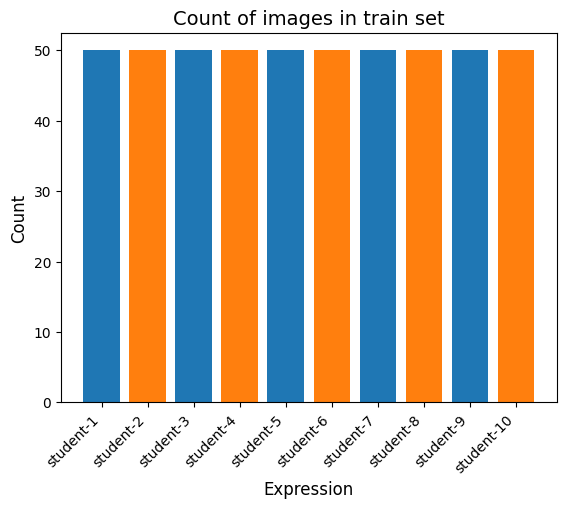

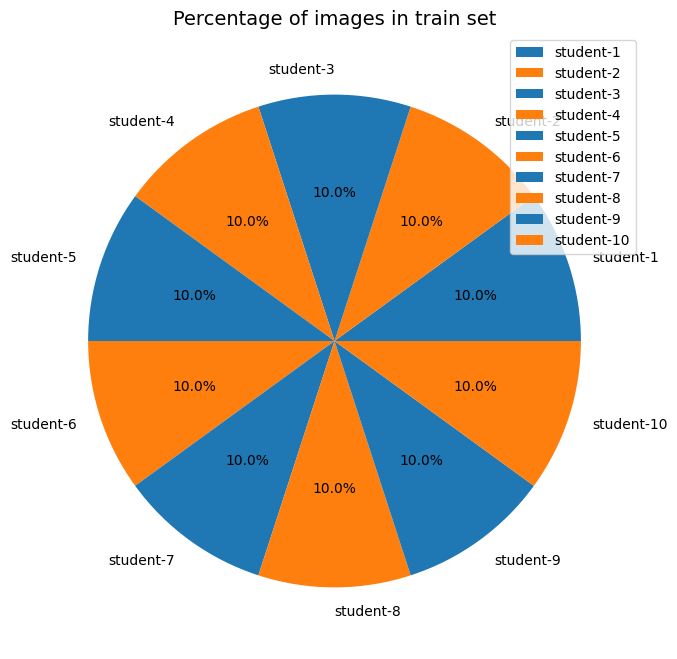

In [ ]:
import matplotlib.pyplot as plt

def plot_count_chart(df, set_):
    fig, ax = plt.subplots()
    ax.bar(df.columns, df.values[0], color=['#1f77b4', '#ff7f0e'])
    ax.set_xlabel('Expression', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Count of images in {set_} set', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.show()

def plot_pie_chart(df, set_):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(df.values[0], labels=df.columns, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
    ax.set_title(f'Percentage of images in {set_} set', fontsize=14)
    ax.legend(df.columns, loc="best", fontsize=10)
    plt.show()

student_recognition_data = count_exp(student_recognition , 'train')

print(student_recognition_data)

plot_count_chart(student_recognition_data, 'train')
plot_pie_chart(student_recognition_data, 'train')


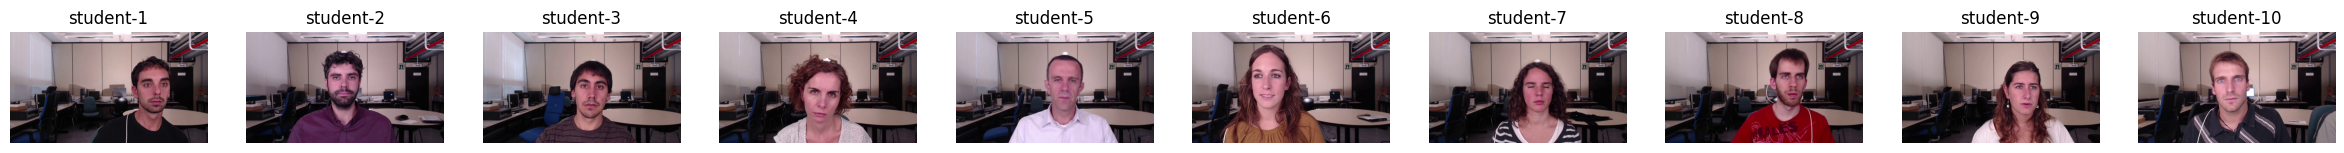

In [ ]:
plt.figure(figsize=(30,30))
i = 1
for expression in os.listdir(student_recognition):
    img = load_img((student_recognition + expression +'/'+ os.listdir(student_recognition + expression)[1]))
    plt.subplot(1,10,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
import shutil
import glob
# Set the path to your dataset directory
#data_dir = '/content/drive/MyDrive/student recognition/'

# Set the path to your output directory
output_dir = '/content/drive/MyDrive/student_recognition_datastore/'



# Create the training and testing directories
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Copy the training images to the training directory
#for file in train_files:
 #   dest = os.path.join(train_dir, os.path.relpath(file, data_dir))
  #  os.makedirs(os.path.dirname(dest), exist_ok=True)
   # shutil.copyfile(file, dest)

# Copy the testing images to the testing directory
#for file in test_files:
 #   dest = os.path.join(test_dir, os.path.relpath(file, data_dir))
  #  os.makedirs(os.path.dirname(dest), exist_ok=True)
   # shutil.copyfile(file, dest)


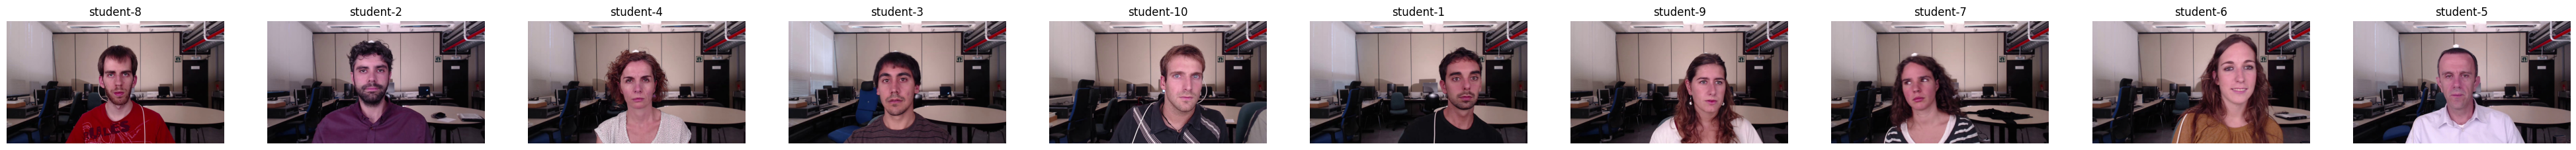

In [15]:
test_path='/content/drive/MyDrive/student_recognition_datastore/test/'
plt.figure(figsize=(50,50))
i = 1
for expression in os.listdir(test_path):
    img = load_img((test_path + expression +'/'+ os.listdir(test_path + expression)[1]))
    plt.subplot(1,10,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=512,
                                                target_size=(48,48),
                                                color_mode='grayscale',
                                                class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=512,
                                                target_size=(48,48),
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 400 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [14]:
test_set

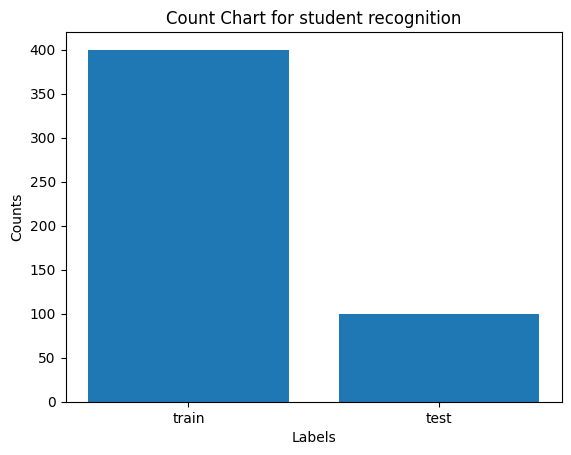

In [ ]:
import matplotlib.pyplot as plt

# Define labels and their corresponding counts
labels = ['train','test']
counts = [400,100]

# Create a bar chart with labels and counts
plt.bar(labels, counts)

# Set the title of the chart and labels for x and y axis
plt.title('Count Chart for student recognition')
plt.xlabel('Labels')
plt.ylabel('Counts')

# Show the chart
plt.show()


In [ ]:
model = tf.keras.models.Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[48, 48, 1]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='adam' ,
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

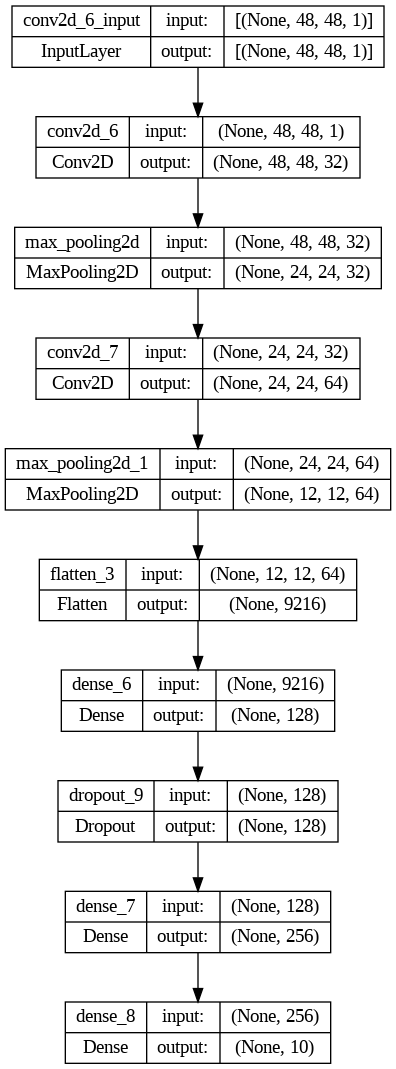

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
history = model.fit(x=training_set,
                 validation_data=test_set,
                 epochs=30)

Epoch 1/30
1/1 [==============================] - 14s 14s/step - loss: 2.3044 - accuracy: 0.0950 - val_loss: 2.3278 - val_accuracy: 0.0400
Epoch 2/30
1/1 [==============================] - 7s 7s/step - loss: 2.2803 - accuracy: 0.1225 - val_loss: 2.3273 - val_accuracy: 0.0400
Epoch 3/30
1/1 [==============================] - 8s 8s/step - loss: 2.2560 - accuracy: 0.1550 - val_loss: 2.2871 - val_accuracy: 0.1500
Epoch 4/30
1/1 [==============================] - 9s 9s/step - loss: 2.2172 - accuracy: 0.2350 - val_loss: 2.2447 - val_accuracy: 0.1800
Epoch 5/30
1/1 [==============================] - 7s 7s/step - loss: 2.1574 - accuracy: 0.2925 - val_loss: 2.1996 - val_accuracy: 0.2100
Epoch 6/30
1/1 [==============================] - 7s 7s/step - loss: 2.1156 - accuracy: 0.2725 - val_loss: 2.1228 - val_accuracy: 0.3600
Epoch 7/30
1/1 [==============================] - 9s 9s/step - loss: 2.0320 - accuracy: 0.3325 - val_loss: 2.0083 - val_accuracy: 0.4800
Epoch 8/30
1/1 [=======================

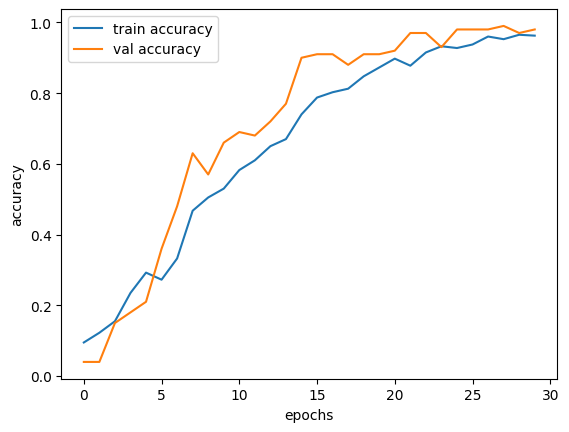

In [ ]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

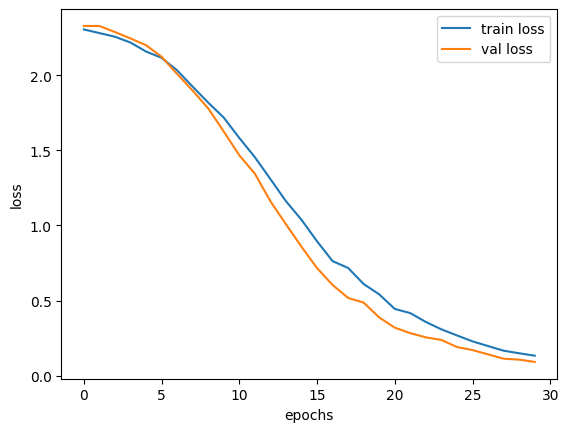

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = training_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

1/1 [==============================] - 23s 23s/step


In [ ]:
class_labels

{0: 'student-1',
 1: 'student-10',
 2: 'student-2',
 3: 'student-3',
 4: 'student-4',
 5: 'student-5',
 6: 'student-6',
 7: 'student-7',
 8: 'student-8',
 9: 'student-9'}

In [ ]:
y_pred

array([8, 8, 8, 8, 8, 9, 8, 8, 2, 8, 8, 8, 8, 2, 8, 2, 2, 4, 8, 8, 8, 2,
       8, 3, 9, 8, 9, 9, 4, 8, 2, 5, 8, 3, 3, 4, 2, 2, 4, 3, 8, 8, 2, 3,
       8, 8, 8, 9, 8, 9, 8, 4, 8, 8, 2, 8, 8, 8, 8, 8, 8, 9, 4, 8, 8, 8,
       8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 2, 8, 5, 4, 8, 8, 8, 8, 9, 2, 6,
       8, 8, 5, 6, 9, 2, 2, 8, 5, 8, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
# Calculate evaluation metrics
accuracy = accuracy_score(test_set.classes, y_pred)
precision = precision_score(test_set.classes, y_pred,average = 'micro')
recall = recall_score(test_set.classes, y_pred,average = 'micro')
f1 = f1_score(test_set.classes, y_pred,average = 'micro')

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))

Accuracy: 0.992
Precision: 0.982
Recall: 0.976
F1-score: 0.984


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

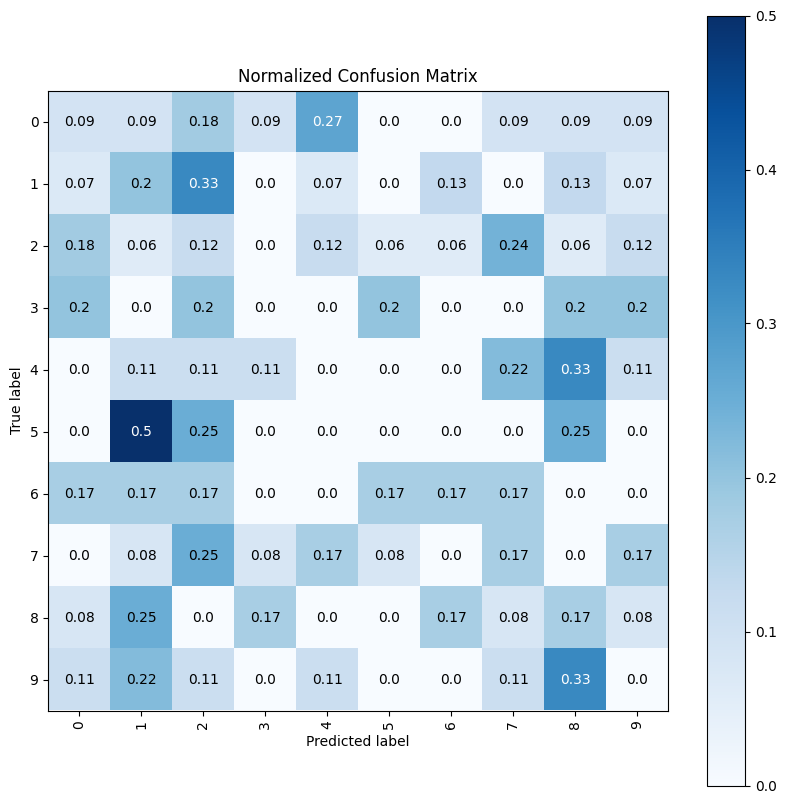

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
skplt.metrics.plot_confusion_matrix(test_set.classes, y_pred,normalize=True,x_tick_rotation=90,figsize=(10,10),cmap='Blues')




In [ ]:
import cv2
import random
#1-4 engaged
#5-8 not engaged
#9-10 engaged
# Load video
#not enganged
#engaged
#video = cv2.VideoCapture("/content/drive/MyDrive/UPNA/Head_Pose_Database_UPNA/User_01/user_01_video_01.mp4")

# Get video properties
#total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Randomly select 50 frames
#frame_indices = random.sample(range(total_frames), 50)

# Loop through each selected frame
#for i in frame_indices:
    # Set the frame position
 #   video.set(cv2.CAP_PROP_POS_FRAMES, i)

    # Read frame
  #  ret, frame = video.read()
   # if not ret:
    #    break

    # Save frame as an image file
    #cv2.imwrite("/content/drive/MyDrive/student engangement/engaged/frame_{}.jpg".format(i), frame)

# Release video
#video.release()


In [ ]:

student_engangement = '/content/drive/MyDrive/student engangement/'

row, col = 48, 48
classes = 2

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

student_engangement_data = count_exp(student_engangement , 'train')

print(student_engangement_data)

       engaged  not enganged
train      267           300


In [ ]:
import os
from sklearn.model_selection import train_test_split

# Define the path to the folder containing two folders for two labels and their images inside
path = '/content/drive/MyDrive/student engangement/'

# Define the list of labels
labels = ['engaged', 'not enganged']

# Define the lists to store the file paths and labels
file_paths = []
file_labels = []

# Loop through the labels and get the file paths and labels for each label
for label in labels:
    label_folder = os.path.join(path, label)
    for filename in os.listdir(label_folder):
        file_path = os.path.join(label_folder, filename)
        file_paths.append(file_path)
        file_labels.append(label)

# Split the file paths and labels into training and testing sets
train_paths, test_paths, train_labels, test_labels = train_test_split(file_paths, file_labels, test_size=0.2, random_state=42)

# Print the number of files in the training and testing sets
print('Number of training files:', len(train_paths))
print('Number of testing files:', len(test_paths))


Number of training files: 453
Number of testing files: 114


       engaged  not enganged
train      267           300


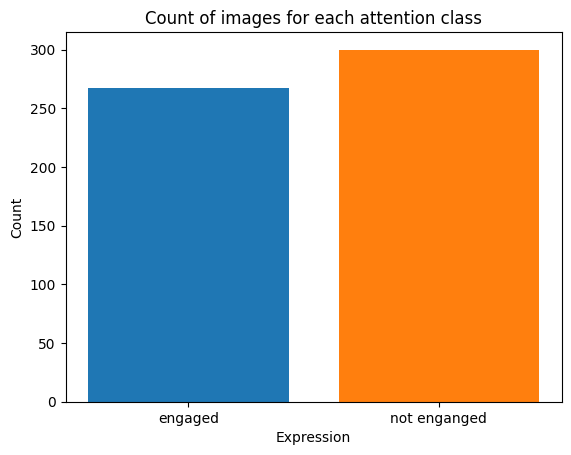

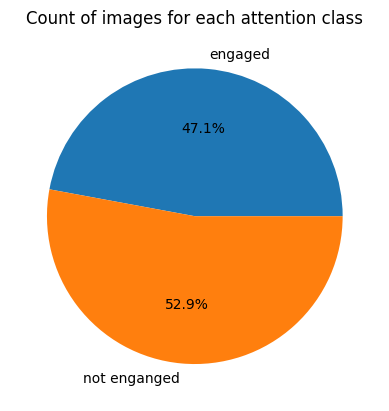

In [ ]:
import matplotlib.pyplot as plt

def plot_count_chart(df, set_):
    fig, ax = plt.subplots()
    ax.bar(df.columns, df.values[0], color=['#1f77b4', '#ff7f0e'])
    ax.set_xlabel('Expression')
    ax.set_ylabel('Count')
    ax.set_title(f'Count of images for each attention class')
    plt.show()

def plot_pie_chart(df, set_):
    fig, ax = plt.subplots()
    ax.pie(df.values[0], labels=df.columns, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
    ax.set_title(f'Count of images for each attention class')
    plt.show()


student_engangement_datastore = count_exp(
student_engangement , 'train')

print(
student_engangement_datastore)

plot_count_chart(
student_engangement_datastore, 'train')
plot_pie_chart(
student_engangement_datastore, 'train')


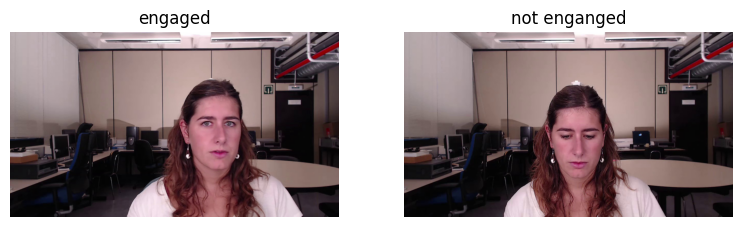

In [ ]:
plt.figure(figsize=(50,50))
i = 1
for expression in os.listdir(student_engangement):
    img = load_img((student_engangement + expression +'/'+ os.listdir(student_engangement + expression)[28]))
    plt.subplot(1,10,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

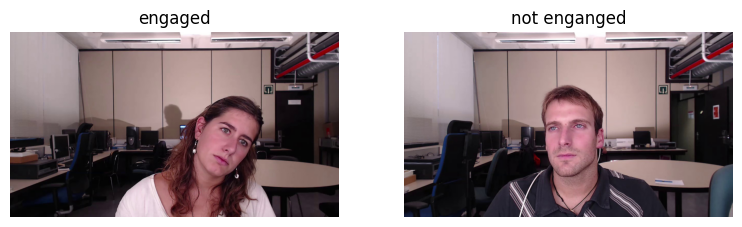

In [16]:
test_path='/content/drive/MyDrive/student_engangement_datastore/test/'
plt.figure(figsize=(50,50))
i = 1
for expression in os.listdir(test_path):
    img = load_img((test_path + expression +'/'+ os.listdir(test_path + expression)[1]))
    plt.subplot(1,10,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
import glob
# Set the path to your dataset directory


# Set the path to your output directory
output_dir = '/content/drive/MyDrive/student_engangement_datastore/'

# Set the ratio of images to use for testing

# Create the training and testing directories
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')



In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=32,
                                                target_size=(48,48),
                                                color_mode='grayscale',
                                                class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=32,
                                                target_size=(48,48),
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 480 images belonging to 2 classes.
Found 114 images belonging to 2 classes.


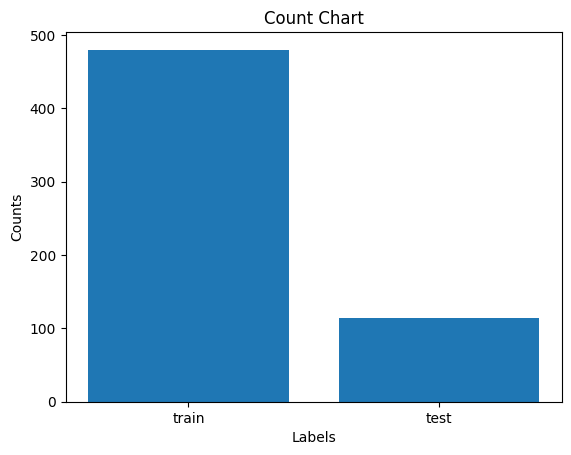

In [ ]:
import matplotlib.pyplot as plt

# Define labels and their corresponding counts
labels = ['train','test']
counts = [480,114]

# Create a bar chart with labels and counts
plt.bar(labels, counts)

# Set the title of the chart and labels for x and y axis
plt.title('Count Chart')
plt.xlabel('Labels')
plt.ylabel('Counts')

# Show the chart
plt.show()


In [ ]:
model = tf.keras.models.Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[48, 48, 1]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    

In [ ]:
history = model.fit(x=training_set,
                 validation_data=test_set,
                 epochs=50)

Epoch 1/50
15/15 [==============================] - 137s 6s/step - loss: 0.6954 - accuracy: 0.5479 - val_loss: 0.6601 - val_accuracy: 0.7982
Epoch 2/50
15/15 [==============================] - 9s 599ms/step - loss: 0.6054 - accuracy: 0.7208 - val_loss: 0.4999 - val_accuracy: 0.7368
Epoch 3/50
15/15 [==============================] - 10s 663ms/step - loss: 0.4661 - accuracy: 0.7708 - val_loss: 0.4176 - val_accuracy: 0.7982
Epoch 4/50
15/15 [==============================] - 10s 695ms/step - loss: 0.4008 - accuracy: 0.8167 - val_loss: 0.3340 - val_accuracy: 0.8246
Epoch 5/50
15/15 [==============================] - 13s 874ms/step - loss: 0.3138 - accuracy: 0.8562 - val_loss: 0.3226 - val_accuracy: 0.8158
Epoch 6/50
15/15 [==============================] - 10s 696ms/step - loss: 0.2639 - accuracy: 0.8875 - val_loss: 0.2322 - val_accuracy: 0.9035
Epoch 7/50
15/15 [==============================] - 10s 709ms/step - loss: 0.2136 - accuracy: 0.9208 - val_loss: 0.2182 - val_accuracy: 0.9035
Ep

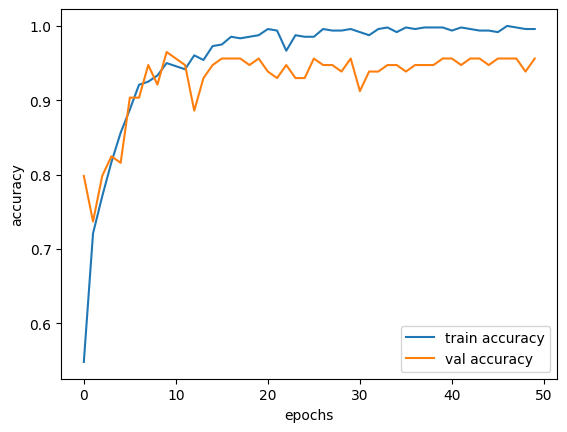

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

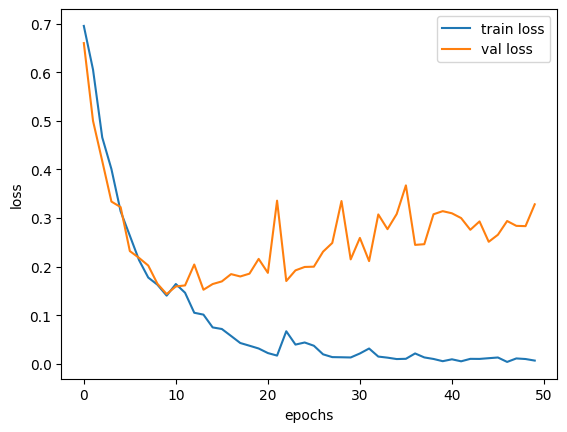

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

1/1 [==============================] - 2s 2s/step


In [ ]:
class_labels

{0: 'engaged', 1: 'not enganged'}

In [ ]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the validation set
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
# Calculate evaluation metrics
accuracy = accuracy_score(test_set.classes, y_pred)
precision = precision_score(test_set.classes, y_pred,average = 'micro')
recall = recall_score(test_set.classes, y_pred,average = 'micro')
f1 = f1_score(test_set.classes, y_pred,average = 'micro')

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))

Accuracy: 0.993
Precision: 0.992
Recall: 0.995
F1-score: 0.992


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

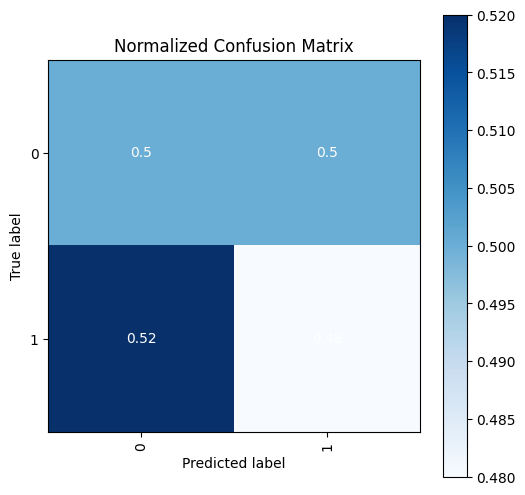

In [ ]:
cm=confusion_matrix(test_set.classes,y_pred)

skplt.metrics.plot_confusion_matrix(test_set.classes,y_pred,normalize=True,x_tick_rotation=90,figsize=(6,6),cmap='Blues')

In [ ]:
cm

array([[36, 26],
       [26, 32]])